## Deep Learning Lab 3

### Question 1: Price Optimization

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,roc_auc_score,confusion_matrix,precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Revenue Cost Function
def revenue_function(w):
    return 0.5 * (w**2) - 30 * w + 100

# Derivative of the Revenue Cost Function
def derivative_revenue_function(w):
    return (1 * w) - 30

# to find the optimium price (w) we will be using Mini Batch Gradient Descent algorithm.
def SGD_momentum_Optimizer(initial_price, learning_rate, momentum,iterations):
    weight_value = initial_price
    velocity = 0

    for i in range(iterations):
        gradient = derivative_revenue_function(weight_value)
        velocity = momentum * velocity + learning_rate * gradient
        weight_value = weight_value - velocity

        print("Iterations: " + str(i + 1) + " weight_value = " + str(weight_value) + "  Optimial Price: " + str(np.abs(revenue_function(weight_value))))

In [76]:
print("Unoptimized Intial Price: " + str(np.abs(revenue_function(20))))

Unoptimized Intial Price: 300.0


In [77]:
weight = 20 #Initial weight
learning_rate = 0.1
momentum = 0.9
iterations = 3

SGD_momentum_Optimizer(weight, learning_rate, momentum,iterations)

Iterations: 1 weight_value = 21.0  Optimial Price: 309.5
Iterations: 2 weight_value = 22.8  Optimial Price: 324.08
Iterations: 3 weight_value = 25.14  Optimial Price: 338.1902


In [78]:
weight = 20 #Initial weight
learning_rate = 0.1
momentum = 0.9
iterations = 50

SGD_momentum_Optimizer(weight, learning_rate, momentum,iterations)

Iterations: 1 weight_value = 21.0  Optimial Price: 309.5
Iterations: 2 weight_value = 22.8  Optimial Price: 324.08
Iterations: 3 weight_value = 25.14  Optimial Price: 338.1902
Iterations: 4 weight_value = 27.732  Optimial Price: 347.42808800000006
Iterations: 5 weight_value = 30.2916  Optimial Price: 349.95748471999997
Iterations: 6 weight_value = 32.56608  Optimial Price: 346.7076167168
Iterations: 7 weight_value = 34.356504  Optimial Price: 340.5104364489921
Iterations: 8 weight_value = 35.5322352  Optimial Price: 334.69718684594034
Iterations: 9 weight_value = 36.037169760000005  Optimial Price: 331.7762906444708
Iterations: 10 weight_value = 35.887893888  Optimial Price: 332.66635278182605
Iterations: 11 weight_value = 35.1647562144  Optimial Price: 336.66264662290837
Iterations: 12 weight_value = 33.99745668672  Optimial Price: 342.01017001889875
Iterations: 13 weight_value = 32.547141443136  Optimial Price: 346.7560352343295
Iterations: 14 weight_value = 30.987143579596797  Optim

In [79]:
weight = 20 #Initial weight
learning_rate = 0.1
momentum = 0.9
iterations = 100

SGD_momentum_Optimizer(weight, learning_rate, momentum,iterations)

Iterations: 1 weight_value = 21.0  Optimial Price: 309.5
Iterations: 2 weight_value = 22.8  Optimial Price: 324.08
Iterations: 3 weight_value = 25.14  Optimial Price: 338.1902
Iterations: 4 weight_value = 27.732  Optimial Price: 347.42808800000006
Iterations: 5 weight_value = 30.2916  Optimial Price: 349.95748471999997
Iterations: 6 weight_value = 32.56608  Optimial Price: 346.7076167168
Iterations: 7 weight_value = 34.356504  Optimial Price: 340.5104364489921
Iterations: 8 weight_value = 35.5322352  Optimial Price: 334.69718684594034
Iterations: 9 weight_value = 36.037169760000005  Optimial Price: 331.7762906444708
Iterations: 10 weight_value = 35.887893888  Optimial Price: 332.66635278182605
Iterations: 11 weight_value = 35.1647562144  Optimial Price: 336.66264662290837
Iterations: 12 weight_value = 33.99745668672  Optimial Price: 342.01017001889875
Iterations: 13 weight_value = 32.547141443136  Optimial Price: 346.7560352343295
Iterations: 14 weight_value = 30.987143579596797  Optim

## Question 2: Neural Network to predict the development of disease

In [80]:
dis_data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
dis_data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [81]:
dis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [82]:
dis_data['A/G Ratio'] = dis_data['A/G Ratio'].fillna(dis_data['A/G Ratio'].mean())

In [83]:
dis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  583 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [84]:
le = LabelEncoder()
dis_data['Gender'] = le.fit_transform(dis_data['Gender'])

dis_data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [85]:
scalable_features = ['TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','A/G Ratio']
scaler = StandardScaler()
for feature in scalable_features:
    dis_data[feature] = scaler.fit_transform(dis_data[feature].values.reshape(-1, 1))

dis_data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898,1
1,62,1,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697,1
2,62,1,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323,1
3,58,1,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351,1
4,72,1,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144,1


In [86]:
X = dis_data.drop(['Selector'],axis=1)
Y = dis_data['Selector']

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Custom Regularization methods


In [88]:
def l1_regularization(val_l1):
    def l1_reg(weights):
        return tf.reduce_sum(tf.abs(weights)) * val_l1
    return l1_reg


def l2_regularization(val_l2):
    def l2_reg(weights):
        return tf.reduce_sum(tf.square(weights)) * val_l2
    return l2_reg

def ElasticNet_regularization(alpha, l1_ratio):
    def elastic_net_reg(weight_matrix):
        l1_loss = tf.reduce_sum(tf.abs(weight_matrix)) * alpha
        l2_loss = tf.reduce_sum(tf.square(weight_matrix)) * (1 - alpha)
        regularization_loss = l1_loss + l2_loss
        return l1_ratio * regularization_loss
    return elastic_net_reg

### Model Building

In [89]:
dis_model_l1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7,activation='relu',input_shape=(10,)), # input layer of shape 10 and hidden layer of 7 neurons
    tf.keras.layers.Dense(4,activation='relu',kernel_regularizer=l1_regularization(0.01)), # hidden layer of neuron count 7
    tf.keras.layers.Dense(1,activation='sigmoid') # Ouput layer of neuron count 1 for binary classification
])

dis_model_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7,activation='relu',input_shape=(10,)), # input layer of shape 10 and hidden layer of 7 neurons
    tf.keras.layers.Dense(4,activation='relu',kernel_regularizer=l2_regularization(0.01)), # hidden layer of neuron count 7
    tf.keras.layers.Dense(1,activation='sigmoid') # Ouput layer of neuron count 1 for binary classification
])

dis_model_elastic = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7,activation='relu',input_shape=(10,)), # input layer of shape 10 and hidden layer of 7 neurons
    tf.keras.layers.Dense(4,activation='relu',kernel_regularizer=ElasticNet_regularization(0.5,0.01)), # hidden layer of neuron count 7
    tf.keras.layers.Dense(1,activation='sigmoid') # Ouput layer of neuron count 1 for binary classification
])

In [90]:
dis_model_l1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
dis_model_l2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
dis_model_elastic.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
# L1 regularization model training
trained_dis_model_l1 = dis_model_l1.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20


15/15 [==============================] - 2s 38ms/step - loss: 0.7952 - accuracy: 0.6567 - val_loss: 0.7835 - val_accuracy: 0.7436
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 0.7788 - accuracy: 0.7060 - val_loss: 0.7687 - val_accuracy: 0.7436
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 0.7627 - accuracy: 0.7060 - val_loss: 0.7538 - val_accuracy: 0.7436
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 0.7470 - accuracy: 0.7060 - val_loss: 0.7391 - val_accuracy: 0.7436
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 0.7305 - accuracy: 0.7060 - val_loss: 0.7229 - val_accuracy: 0.7436
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 0.7129 - accuracy: 0.7060 - val_loss: 0.7054 - val_accuracy: 0.7436
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 0.6946 - accuracy: 0.7060 - val_loss: 0.6873 - val_accuracy: 0.7436
Epoch 8/20
15/15 [============

In [92]:
# L2 Regularization model training
trained_dis_model_l2 = dis_model_l2.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
15/15 [==============================] - 2s 39ms/step - loss: -4.3160 - accuracy: 0.7060 - val_loss: -4.0614 - val_accuracy: 0.7350
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: -4.8915 - accuracy: 0.7060 - val_loss: -4.5337 - val_accuracy: 0.7350
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: -5.4650 - accuracy: 0.7060 - val_loss: -5.0504 - val_accuracy: 0.7350
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: -6.0917 - accuracy: 0.7060 - val_loss: -5.6155 - val_accuracy: 0.7350
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: -6.7422 - accuracy: 0.7060 - val_loss: -6.2642 - val_accuracy: 0.7350
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: -7.5198 - accuracy: 0.7060 - val_loss: -6.9305 - val_accuracy: 0.7350
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: -8.3408 - accuracy: 0.7060 - val_loss: -7.6635 - val_accuracy: 0.7350
Epoch

In [93]:
# Elastic Net regularization model training
trained_dis_model_elastic = dis_model_elastic.fit(X_train,Y_train,epochs=20,validation_data=(X_test,Y_test))

Epoch 1/20
15/15 [==============================] - 2s 35ms/step - loss: 8.4536 - accuracy: 0.0043 - val_loss: 6.8465 - val_accuracy: 0.0085
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 5.3193 - accuracy: 0.0172 - val_loss: 3.7110 - val_accuracy: 0.0171
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 2.5141 - accuracy: 0.0944 - val_loss: 1.2506 - val_accuracy: 0.3077
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 0.6291 - accuracy: 0.5150 - val_loss: 0.0159 - val_accuracy: 0.7436
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: -0.3564 - accuracy: 0.6996 - val_loss: -0.5699 - val_accuracy: 0.7436
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: -0.8894 - accuracy: 0.7060 - val_loss: -0.9822 - val_accuracy: 0.7436
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: -1.3420 - accuracy: 0.7060 - val_loss: -1.3344 - val_accuracy: 0.7436
Epoch 8/20
1

In [94]:
# L1 Regularisation model prediction
l1_model_predictions = dis_model_elastic.predict(X_test)
l1_model_decisions = (l1_model_predictions > 0.5).astype(int)

# L2 Regularisation model prediction
l2_model_predictions = dis_model_l2.predict(X_test)
l2_model_decisions = (l2_model_predictions > 0.5).astype(int)

# Elastic Net model prediction
elastic_model_predictions = dis_model_elastic.predict(X_test)
elastic_model_decisions = (elastic_model_predictions > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


### L1 Regularization Model Metrics

In [95]:
# Metrics
accuracy = accuracy_score(Y_test, l1_model_decisions)
precision = precision_score(Y_test, l1_model_decisions)
recall = recall_score(Y_test, l1_model_decisions)
f1 = f1_score(Y_test, l1_model_decisions)
roc_auc = roc_auc_score(Y_test, l1_model_decisions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, l1_model_decisions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7435897435897436
Precision: 0.7435897435897436
Recall: 1.0
F1 Score: 0.8529411764705882
ROC AUC Score: 0.5
Confusion Matrix:
[[87  0]
 [30  0]]


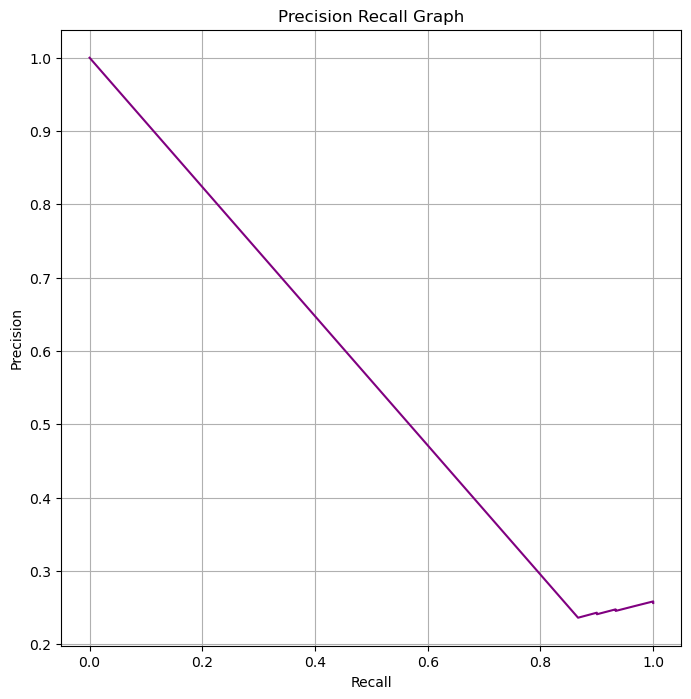

In [97]:
# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, l1_model_predictions,pos_label=2)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='purple', label='Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Graph')
plt.grid(True)
plt.show()

### L2 Regularization Metrics

Accuracy: 0.7350427350427351
Precision: 0.5512820512820513
Recall: 0.7350427350427351
F1 Score: 0.63003663003663
ROC AUC Score: 0.5057471264367817
Confusion Matrix:
[[ 0  0  0]
 [ 1 86  0]
 [ 0 30  0]]


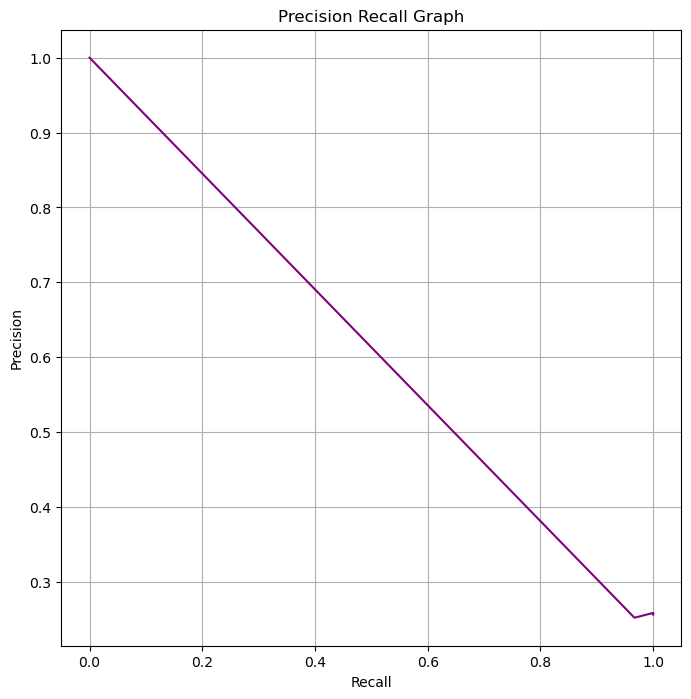

In [103]:
# Metrics
accuracy = accuracy_score(Y_test, l2_model_decisions)
precision = precision_score(Y_test, l2_model_decisions, average='weighted')  
recall = recall_score(Y_test, l2_model_decisions, average='weighted') 
f1 = f1_score(Y_test, l2_model_decisions, average='weighted')  
roc_auc = roc_auc_score(Y_test, l2_model_decisions)  

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, l2_model_decisions)
print("Confusion Matrix:")
print(conf_matrix)

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, l2_model_predictions,pos_label=2)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='purple', label='Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Graph')
plt.grid(True)
plt.show()

### ElasticNet Regularization Metrics

Accuracy: 0.7435897435897436
Precision: 0.7435897435897436
Recall: 1.0
F1 Score: 0.8529411764705882
ROC AUC Score: 0.5
Confusion Matrix:
[[87  0]
 [30  0]]


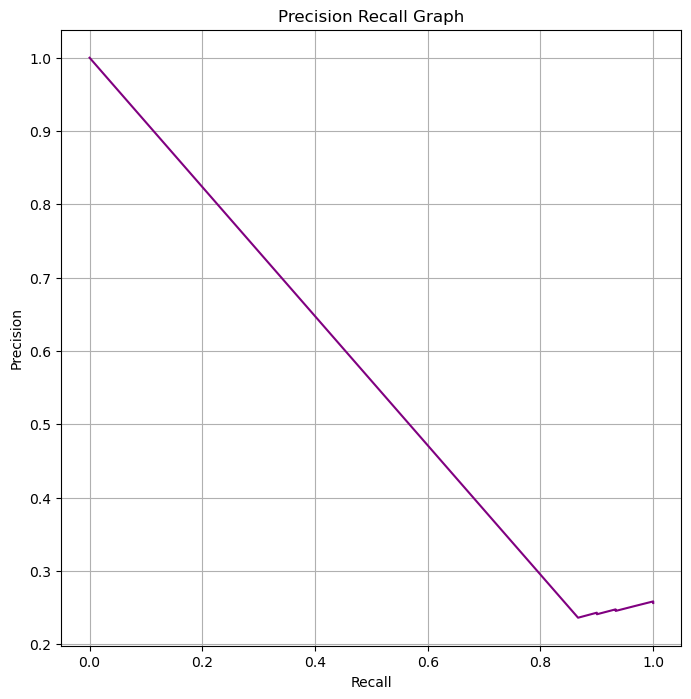

In [104]:
# Metrics
accuracy = accuracy_score(Y_test, elastic_model_decisions)
precision = precision_score(Y_test, elastic_model_decisions, average='binary')  
recall = recall_score(Y_test, elastic_model_decisions, average='binary') 
f1 = f1_score(Y_test, elastic_model_decisions, average='binary')  
roc_auc = roc_auc_score(Y_test, elastic_model_decisions)  

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, elastic_model_decisions)
print("Confusion Matrix:")
print(conf_matrix)

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(Y_test, elastic_model_predictions,pos_label=2)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='purple', label='Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Graph')
plt.grid(True)
plt.show()

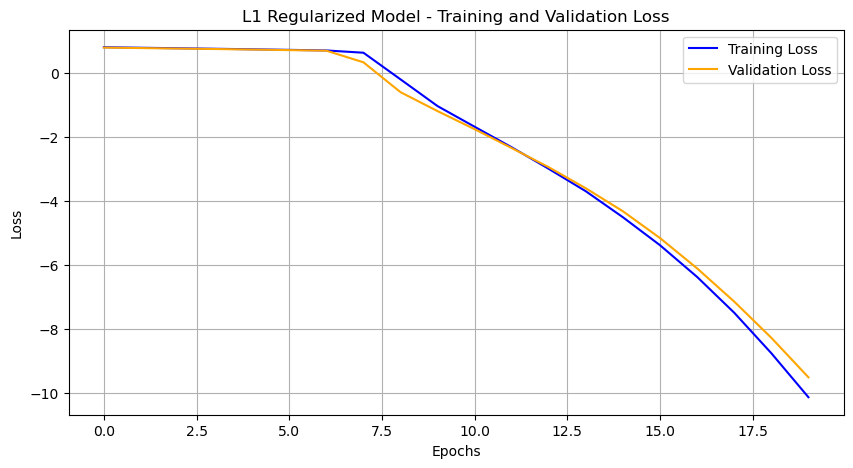

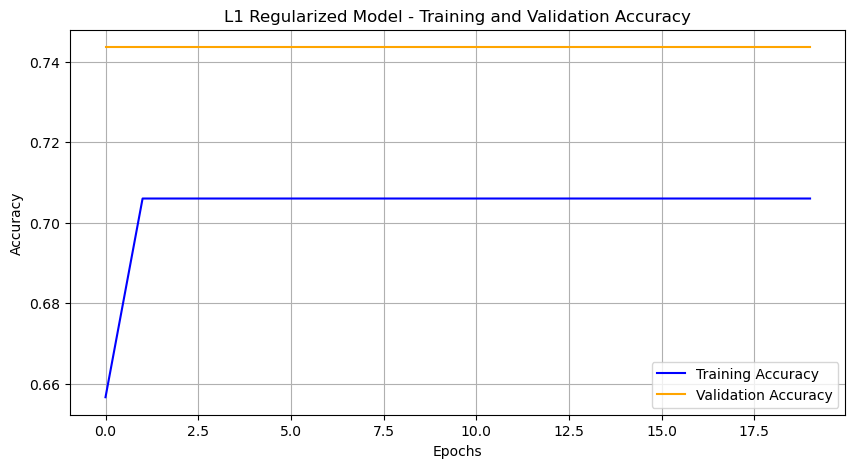

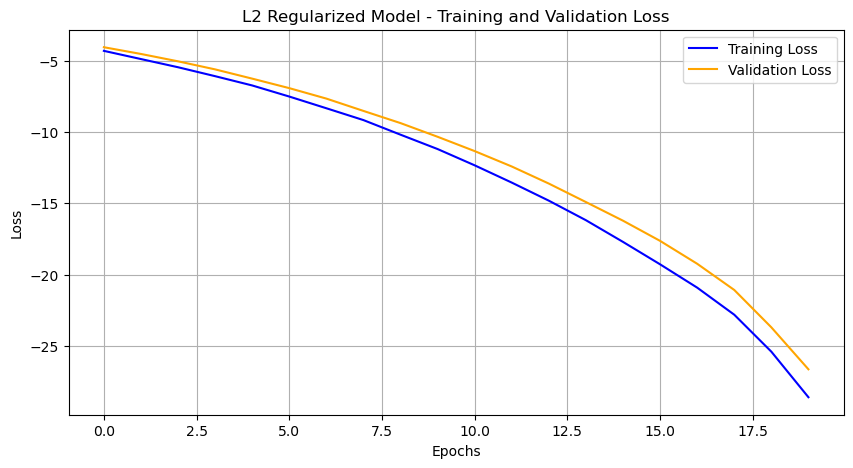

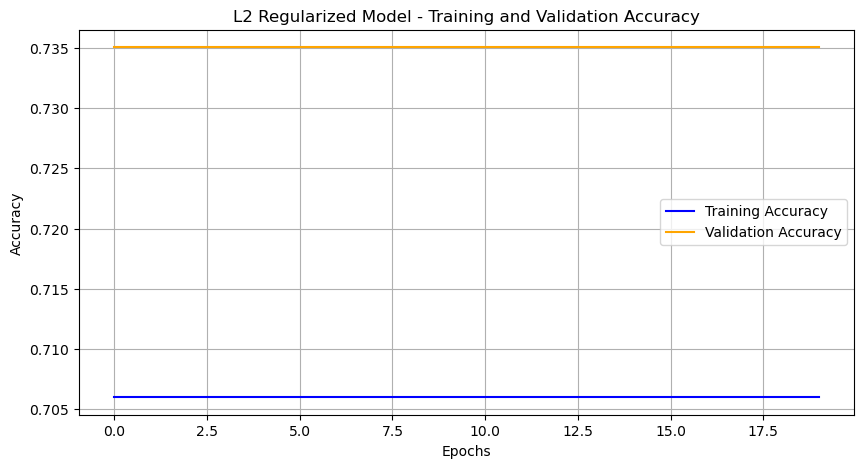

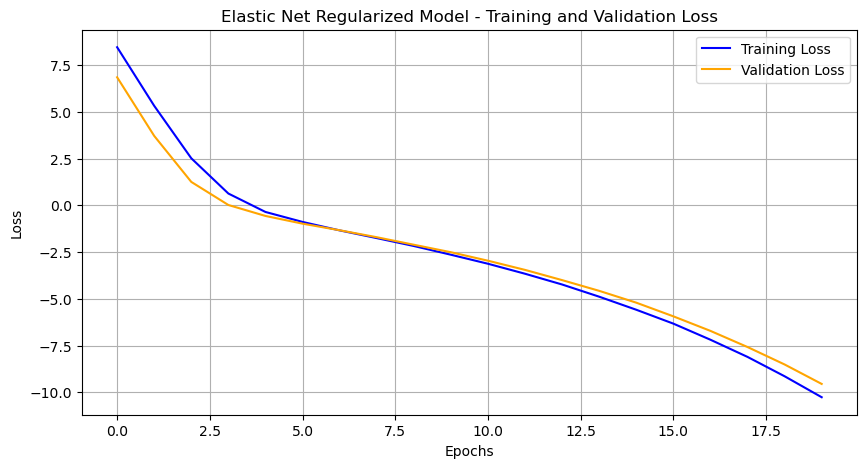

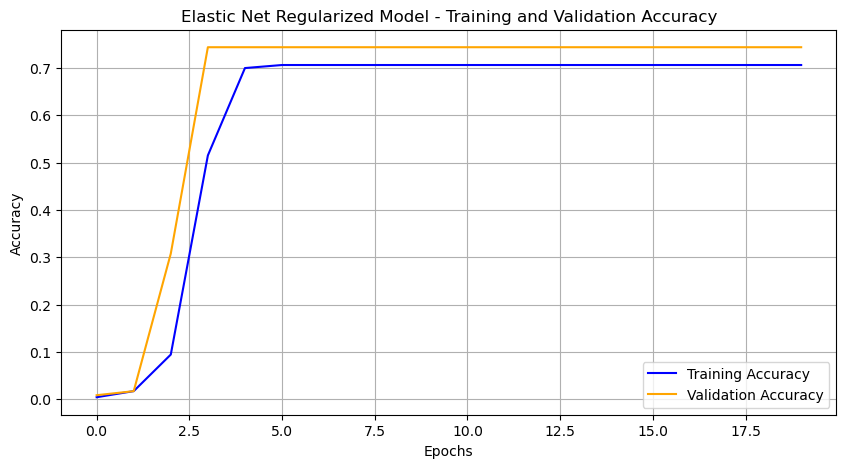

In [105]:
#  function to plot learning curves
def learning_curves_graph(model_info,name):
    train_loss = model_info.history['loss']
    valid_loss = model_info.history['val_loss']
    train_accuracy = model_info.history['accuracy']
    valid_accuracy = model_info.history['val_accuracy']

    # Plot loss graphs
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.plot(valid_loss, label='Validation Loss', color='orange')
    plt.title(f'{name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot accuracy graphs
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracy, label='Training Accuracy', color='blue')
    plt.plot(valid_accuracy, label='Validation Accuracy', color='orange')
    plt.title(f'{name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


learning_curves_graph(trained_dis_model_l1, 'L1 Regularized Model')

learning_curves_graph(trained_dis_model_l2, 'L2 Regularized Model')

learning_curves_graph(trained_dis_model_elastic, 'Elastic Net Regularized Model')

#### From obeserving the metrics and the graphs,it suggests that the L2 regularised model performs worse in terms of precision and F1 score, whereas the L1 and Elastic Net regularised models perform equally and show a better balance between accuracy and recall.